<a href="https://colab.research.google.com/github/avganshina/Digit_Recognizer/blob/main/digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Digit Recognizer by Anastasia Ganshina**

---






1. Import Necessary Packages


In [77]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import imageio
import random

2. Load and Visualize Dataset

In [31]:
# loading data to train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [32]:
print('The train dataset has',len(X_train),'images.')
print('The test dataset has',len(X_test),'images.')

The train dataset has 60000 images.
The test dataset has 10000 images.


5


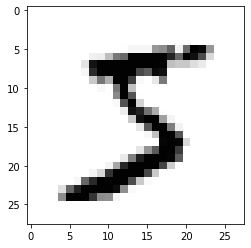

0


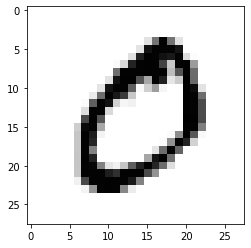

4


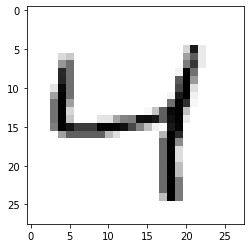

1


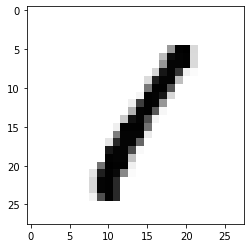

In [33]:
# Visualize the images
for image_index in range (0,4):
  print(y_train[image_index])
  plt.imshow(X_train[image_index], cmap='Greys')
  plt.show()

3. Designing the Model

In [34]:
#reshape the data to fit the model
X_train = X_train.reshape(60000, 28, 28,1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [35]:
# Convert Categorical Data to Numerical Data by using one hot encoding
y_train_num = to_categorical(y_train)
y_test_num = to_categorical(y_test)

In [36]:
#Build th model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1))) # input layer
model.add(Conv2D(32, kernel_size=3, activation = 'relu')) # Second (hidden) layer
model.add(Flatten()) # Flatten to process
model.add(Dense(10,activation = 'softmax')) #output layer

In [37]:
#compile the model
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

4. Train the Model

In [38]:
#train the model
model.fit(
    X_train,
    y_train_num, 
    epochs = 3
)


Epoch 1/3
1875/1875 [==============================] - 167s 89ms/step - loss: 0.5256 - accuracy: 0.9171
Epoch 2/3
1875/1875 [==============================] - 167s 89ms/step - loss: 0.0568 - accuracy: 0.9823
Epoch 3/3
1875/1875 [==============================] - 168s 90ms/step - loss: 0.0391 - accuracy: 0.9877


5. Testing the model

5


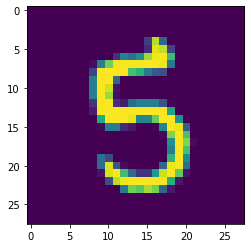

In [112]:
i = random.randint(1,10000)
plt.imshow(X_test[i].reshape(28,28))
predictions = model.predict(X_test)
print(predictions[i].argmax())
